In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [80]:
dataset=pd.read_csv(r"E:\tops\Data science\ML Model\Price Prediction\data.csv")


In [81]:
dataset.head(10)

,Date,Price,Open,High,Low,Volume,Change(%)
0,24-Sep-25,494.70,490.75,495.80,483.50,1568815,1.16%
1,23-Sep-25,489.05,486.40,497.65,486.35,2074346,0.54%
2,22-Sep-25,486.40,483.00,490.40,481.35,1131081,1.20%
3,19-Sep-25,480.65,485.00,485.05,476.05,947737,-0.80%
4,18-Sep-25,484.55,486.70,491.00,481.25,610388,0.23%
5,17-Sep-25,483.45,493.95,499.00,482.25,2095486,-0.58%
6,16-Sep-25,486.25,480.50,491.00,479.75,1587021,1.47%
7,15-Sep-25,479.20,476.00,486.40,470.55,975708,0.79%
8,12-Sep-25,475.45,480.15,481.00,470.00,1390599,-0.49%
9,11-Sep-25,477.80,480.15,480.30,475.15,642776,-0.36%


In [85]:
dataset=dataset.dropna()

In [91]:
dataset.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Change    0
target    0
dtype: int64

In [83]:
dataset['target']=dataset['Price'].shift(3)

In [87]:
dataset['Change(%)'] = dataset['Change(%)'].str.replace('%','').astype(float)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [90]:
dataset.columns = dataset.columns.str.strip()
dataset.rename(columns=lambda x: x.replace('%','').replace('(','').replace(')',''), inplace=True)
print(dataset.columns)


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change', 'target'], dtype='object')


In [111]:
dataset.head(10)

,Date,Price,Open,High,Low,Volume,Change,target
3,19-Sep-25,480.65,485.00,485.05,476.05,947737,-0.80,494.70
4,18-Sep-25,484.55,486.70,491.00,481.25,610388,0.23,489.05
5,17-Sep-25,483.45,493.95,499.00,482.25,2095486,-0.58,486.40
6,16-Sep-25,486.25,480.50,491.00,479.75,1587021,1.47,480.65
7,15-Sep-25,479.20,476.00,486.40,470.55,975708,0.79,484.55
8,12-Sep-25,475.45,480.15,481.00,470.00,1390599,-0.49,483.45
9,11-Sep-25,477.80,480.15,480.30,475.15,642776,-0.36,486.25
10,10-Sep-25,479.55,483.50,483.90,473.10,875353,-0.38,479.20
11,09-Sep-25,481.40,482.65,485.00,477.25,447151,0.29,475.45
12,08-Sep-25,480.00,484.95,491.00,478.35,638840,-0.58,477.80


In [97]:
# सिर्फ simple list बनाओ
features = ['Price', 'Open', 'High', 'Low', 'Volume', 'Change']

# dataframe से select करो
X = dataset[features].values

# target
y = dataset['target'].values.reshape(-1,1)


In [99]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [100]:
# yaha hum 1 timestep use kar rahe hain (aaj ka data -> 3 din baad)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [101]:
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]


In [102]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # output = price
model.compile(optimizer='adam', loss='mse')

# Model Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


E:\app\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2395 - val_loss: 0.0041
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - val_loss: 0.0250
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0139
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 9.5748e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 8.4383e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 7.4467e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7054e-04 - val_loss: 6.9283e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5953e-04 - val_loss: 6.8550e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5865e-04 - val_loss: 6.5662e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step 


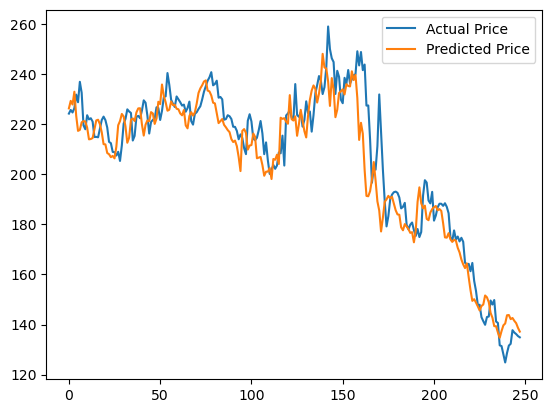

In [103]:
# Test set predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Actual prices
y_actual = scaler_y.inverse_transform(y_test)

# Compare plot
plt.plot(y_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.show()


In [127]:
import numpy as np

# आज का data
today_data = np.array([[493.25,494.35,495.90,488.20,1016000,-0.29]])


In [128]:
today_scaled = scaler_X.transform(today_data)  # scaler_X = training scaler


In [129]:
today_scaled = today_scaled.reshape(1, 1, today_scaled.shape[1])


In [130]:
predicted_scaled = model.predict(today_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [131]:
predicted_price = scaler_y.inverse_transform(predicted_scaled)
print("3 daye after predicted price:", predicted_price[0][0])


3 दिन बाद की predicted price: 494.88904
